In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.impute import SimpleImputer
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [139]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')

In [140]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [141]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [142]:
df.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [143]:
df.sample(5)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
411,CS-97412,D+,D+,C,D,C,C,B-,C+,D+,...,A,D+,C+,B-,D+,B,D+,B+,NaN,2.034
565,CS-97566,F,F,D,C-,NaN,D+,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800
444,CS-97445,B+,C+,B+,B,C,A-,B,B,B+,...,B,C,B+,D,C+,A-,B+,B-,C-,2.424
239,CS-97240,A,B+,A,A+,A-,A+,A-,A,A-,...,B,A-,B,B-,A-,A,B,B+,A,3.573
516,CS-97517,B,D,A-,D,B+,D+,B+,C-,C-,...,D+,F,A,C,F,C-,B,F,F,1.953


in this dataset as we can see Seat No is having all unique values in the ascending format so we can make this columns as an index column

In [144]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: Seat No., Length: 571, dtype: int64


A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64


A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64


A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64


A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64


A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64


A     151
A-    134
B+     60
B      51

this are the unique values present in the dataset

In [145]:
df=df.set_index('Seat No.')
df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
Seat No.,,,,,,,,,,,,,,,,,,,,,
CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
CS-97002,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
CS-97003,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
CS-97004,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [146]:
df.nunique().to_frame()

,0
PH-121,13
HS-101,12
CY-105,13
HS-105/12,13
MT-111,13
CS-105,11
CS-106,13
EL-102,13
EE-119,12
ME-107,13


this are the number of unique values which are present in the dataset

In [147]:
df.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

in this dataset we have null values we have to fill this null values using simple imputer method

In [148]:
df.dtypes


PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [149]:
imp=SimpleImputer(strategy='most_frequent')
for i in df.columns:
    if df[i].dtypes!='float64':
        df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [150]:
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

here we have filled the null values using the simple imputer method

In [151]:
df.shape

(571, 42)

this dataset contains 571 rows and the 43 columns out of that 1 is our target variable.

In [152]:
df.columns.tolist()

['PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412',
 'CGPA']

our dataset contains this are the features names

In [153]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
Seat No.,,,,,,,,,,,,,,,,,,,,,
CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
CS-97002,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
CS-97003,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
CS-97004,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS-97567,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
CS-97568,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
CS-97569,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470


In [154]:
dr=df['CGPA'].value_counts().to_frame()
dr

,CGPA
3.019,5
3.058,3
2.793,3
3.443,3
2.206,3
...,...
2.555,1
2.042,1
2.634,1
2.053,1


maximum CGPA 3.985
minimum CGPA 0.8
average of CGPA 2.9548879159369528
0    3.019
Name: CGPA, dtype: float64


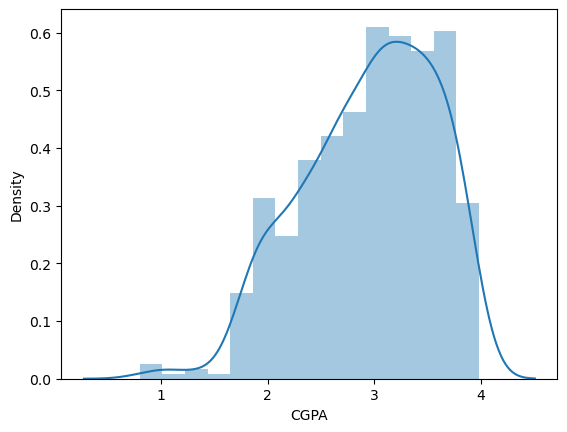

In [155]:
print('maximum CGPA',df['CGPA'].max())
print('minimum CGPA',df['CGPA'].min())
print('average of CGPA',df['CGPA'].mean())
print(df['CGPA'].mode())

sns.distplot(df['CGPA'])
plt.show()

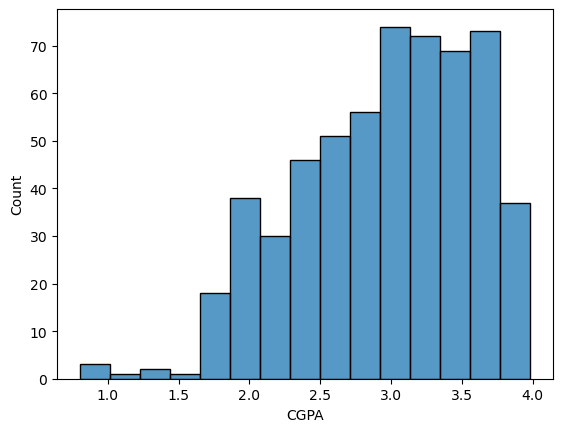

In [156]:
sns.histplot(x='CGPA',data=df)
plt.show()

in this histogram plot we can see most of the values are liening between 3.0 to 3.6 it means in this dataset most of the student got the 'CGPA' between 3.0 to 3.6  

The 0 percentile of CGPA 0.8
The 25th percentile of CGPA 2.5380000000000003
The 50th percentile of CGPA 3.029
The 75th percentile of CGPA 3.451
The 100th percrntle of CGPA 3.985


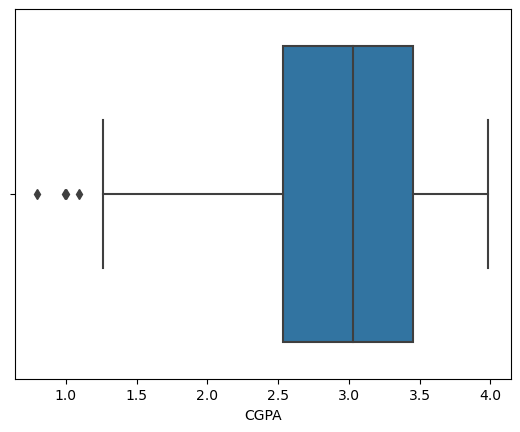

In [157]:
print('The 0 percentile of CGPA',df['CGPA'].quantile(0))
print('The 25th percentile of CGPA',df['CGPA'].quantile(.25))
print('The 50th percentile of CGPA',df['CGPA'].quantile(.50))
print('The 75th percentile of CGPA',df['CGPA'].quantile(.75))
print('The 100th percrntle of CGPA',df['CGPA'].quantile(1))
sns.boxplot(x='CGPA',data=df)
plt.show()

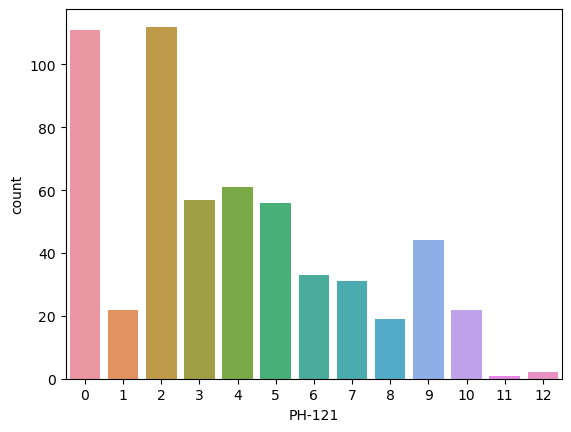

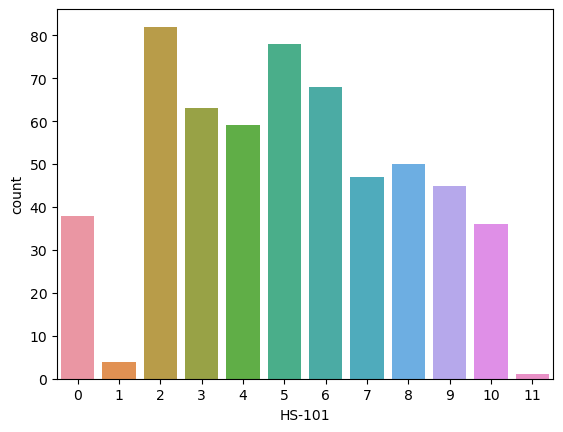

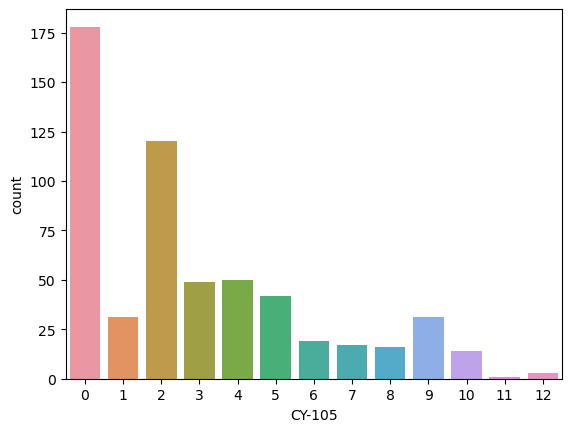

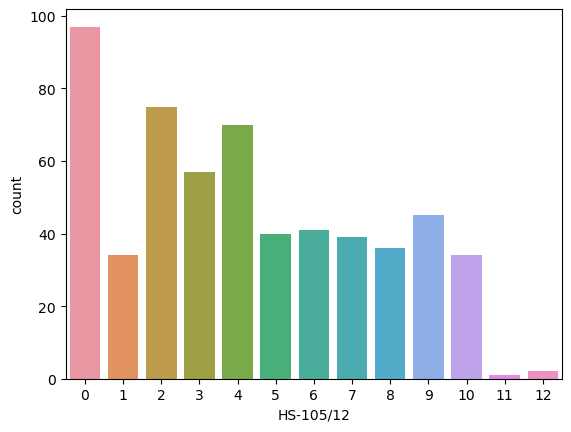

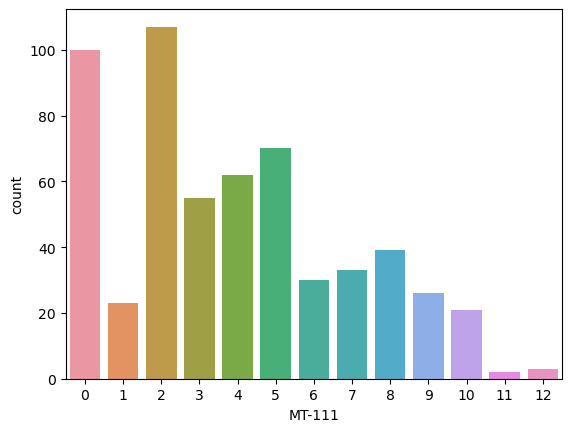

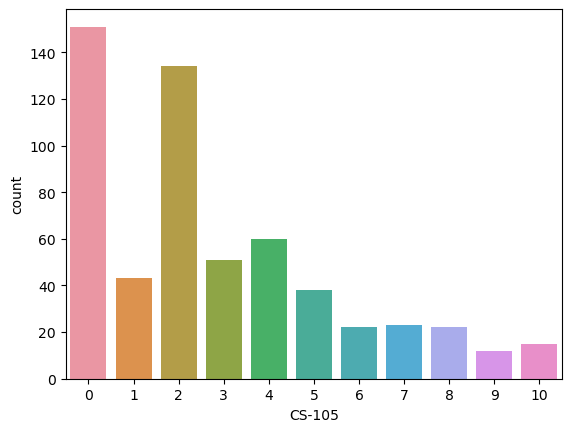

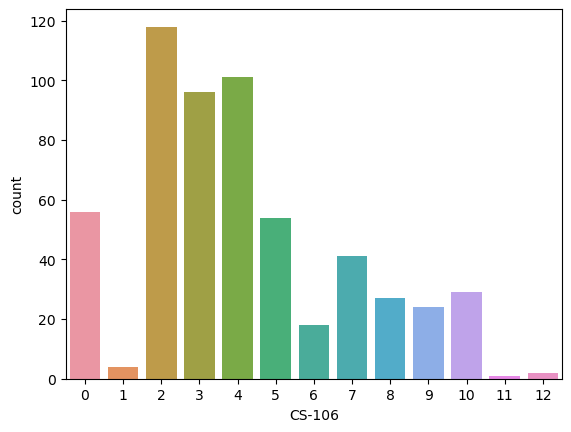

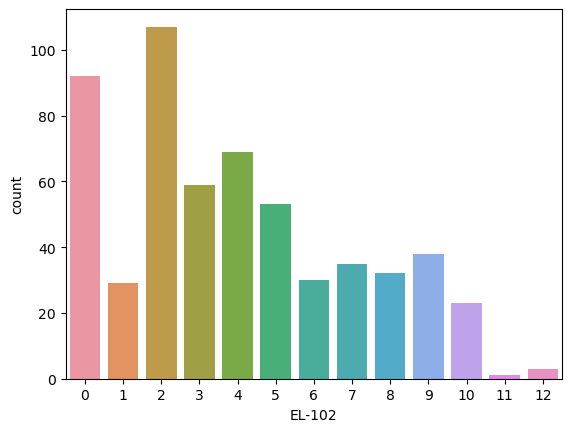

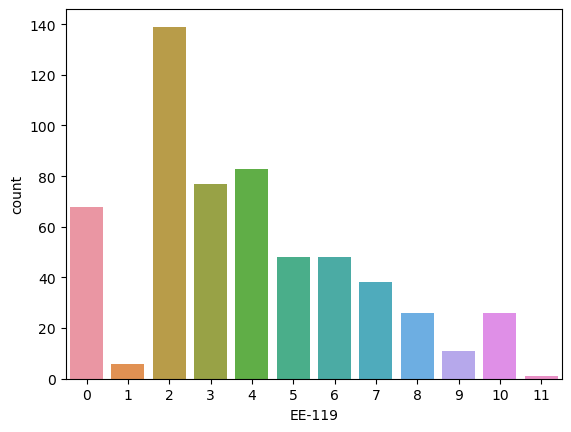

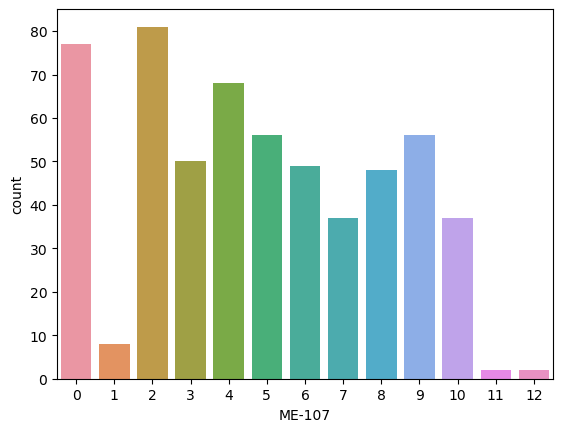

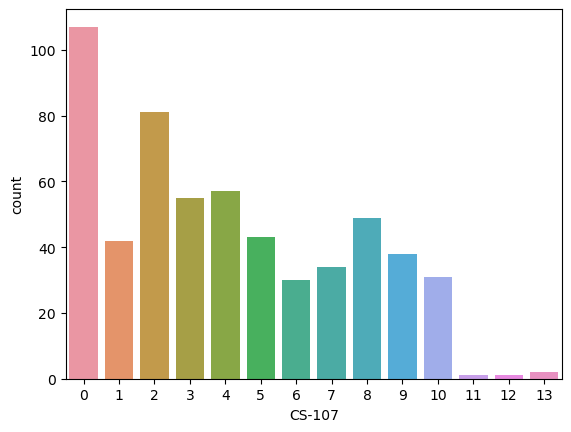

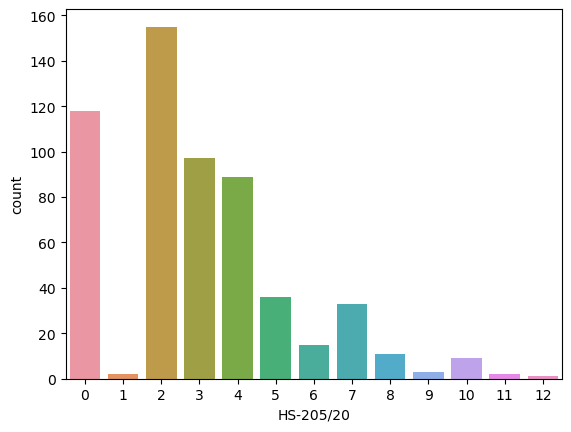

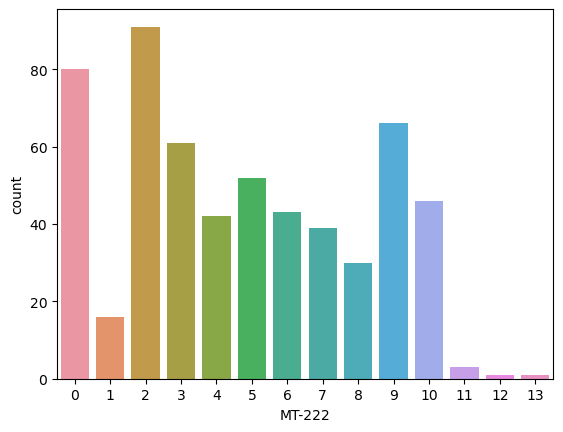

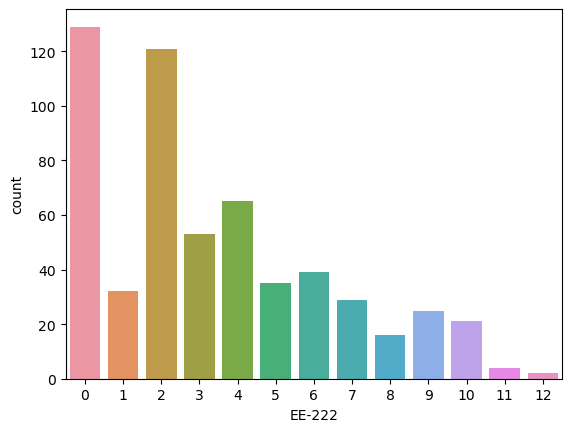

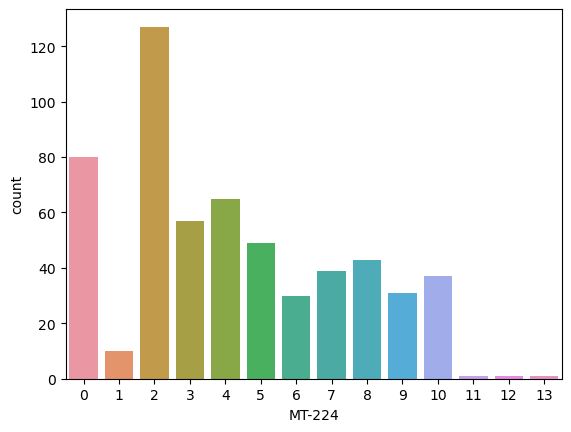

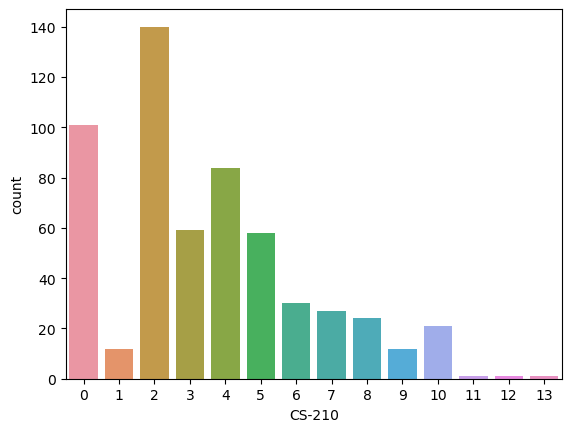

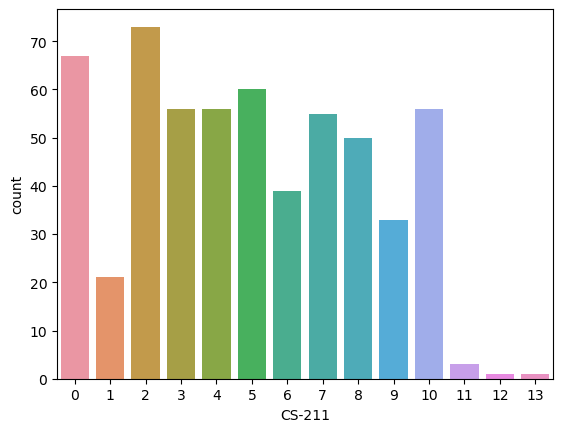

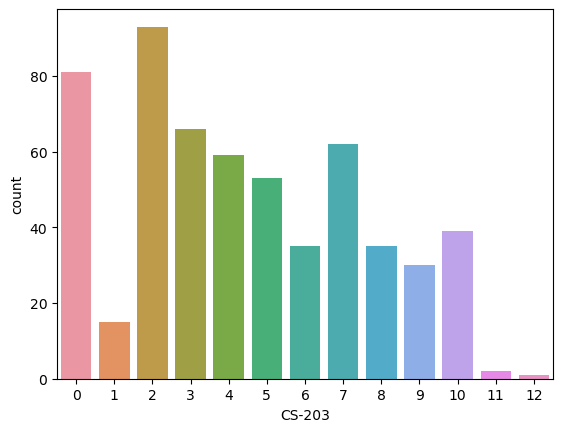

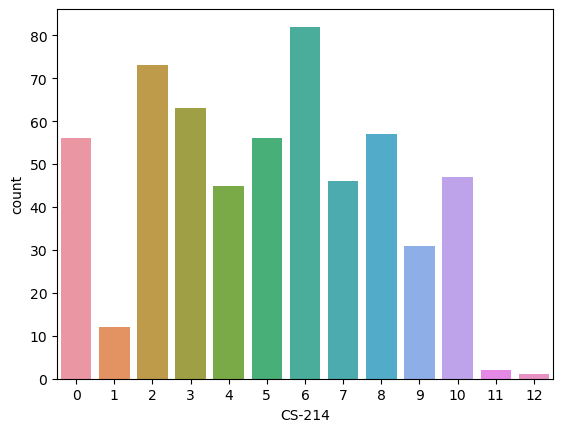

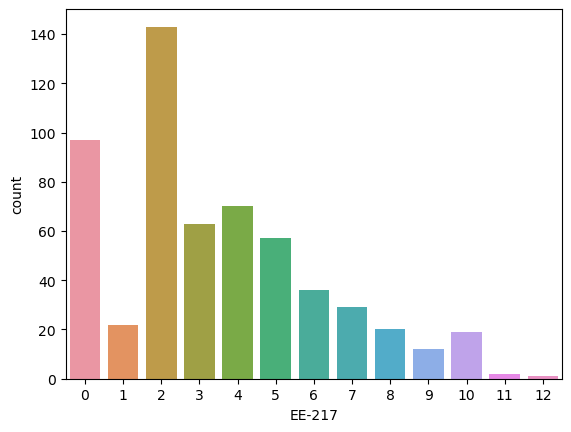

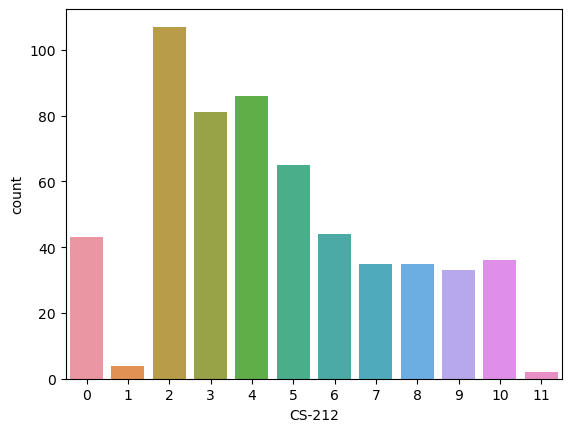

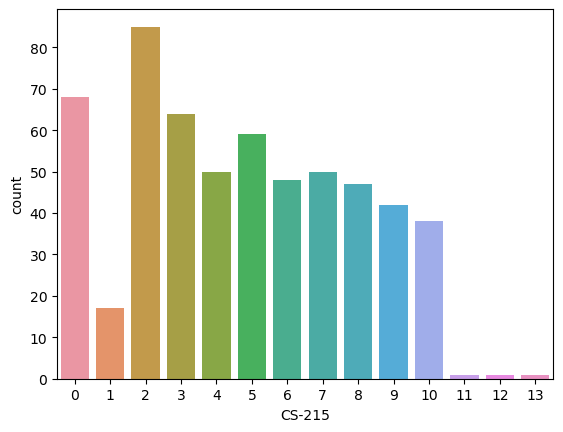

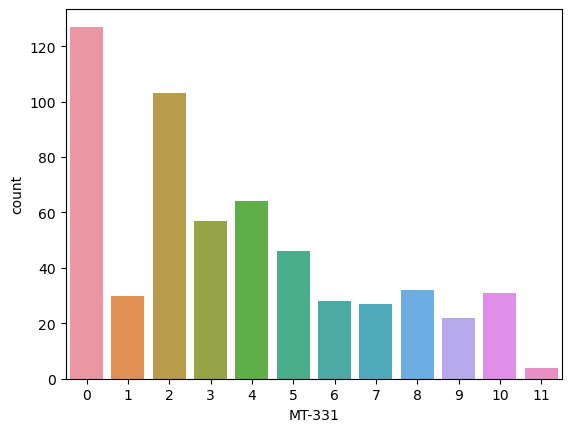

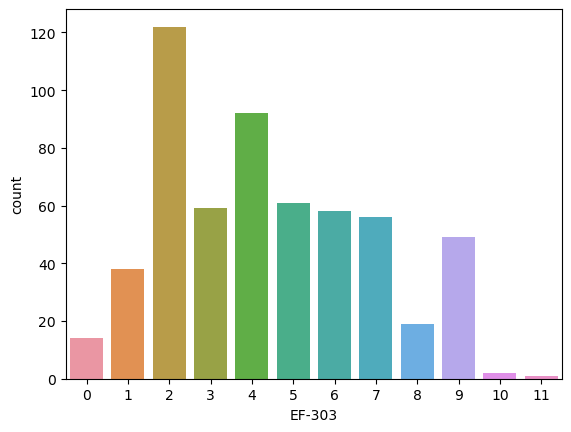

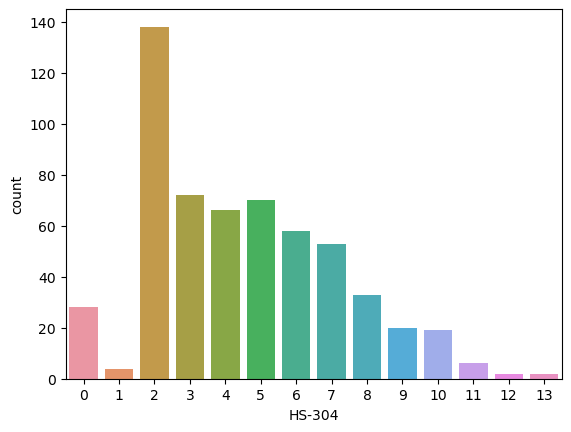

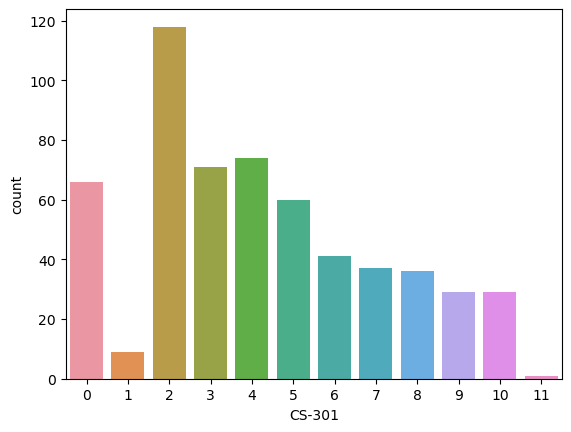

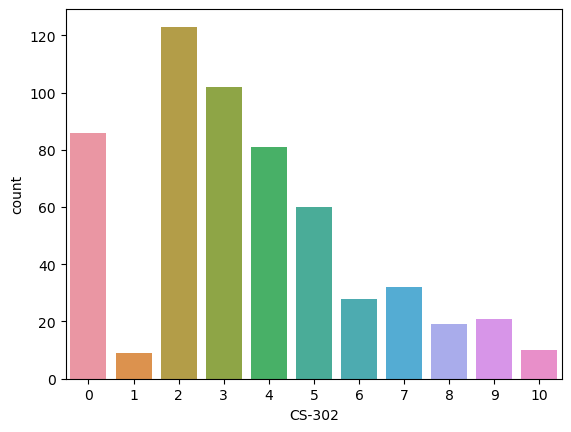

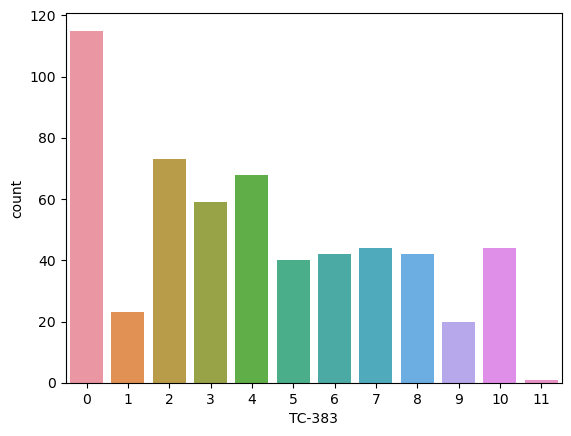

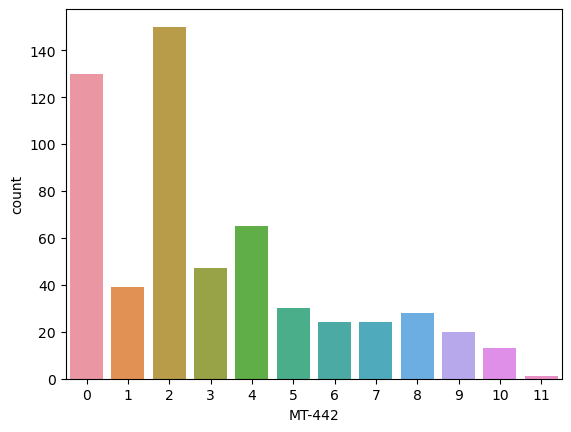

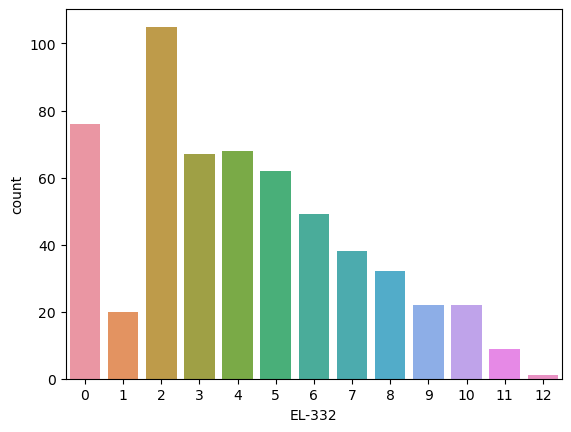

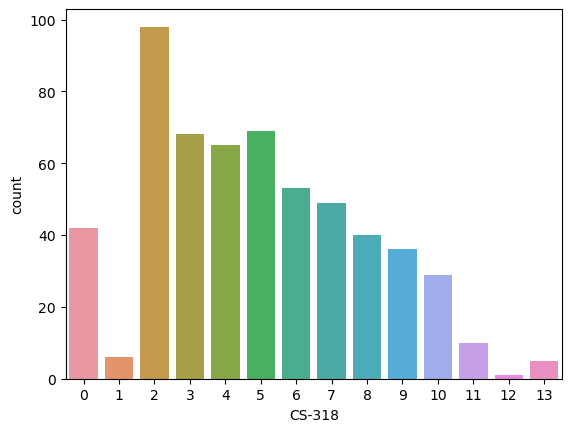

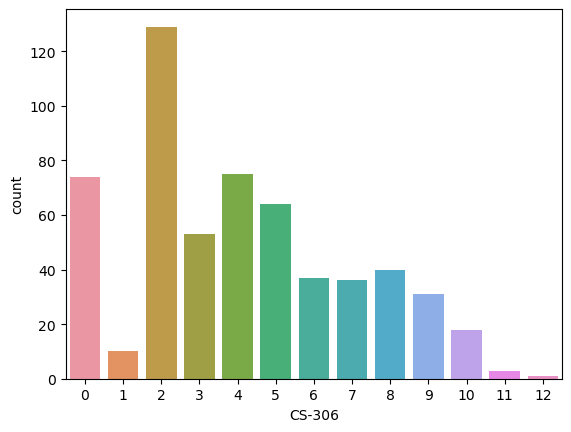

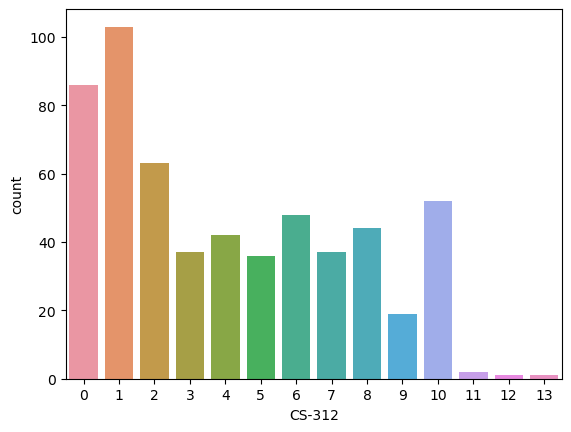

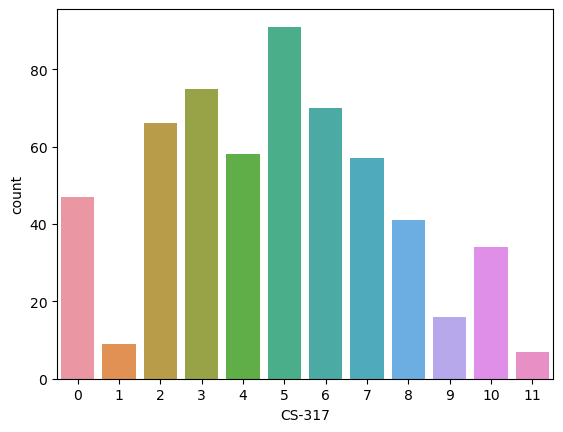

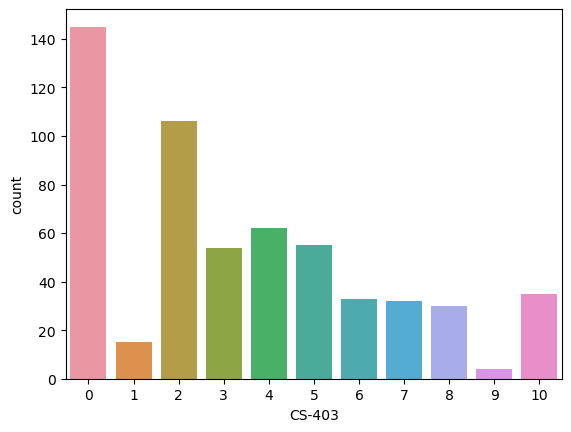

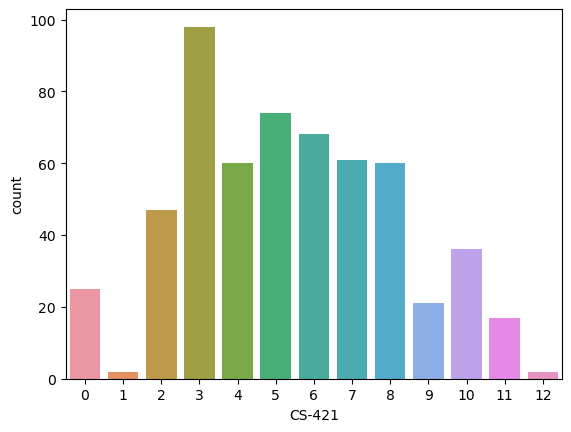

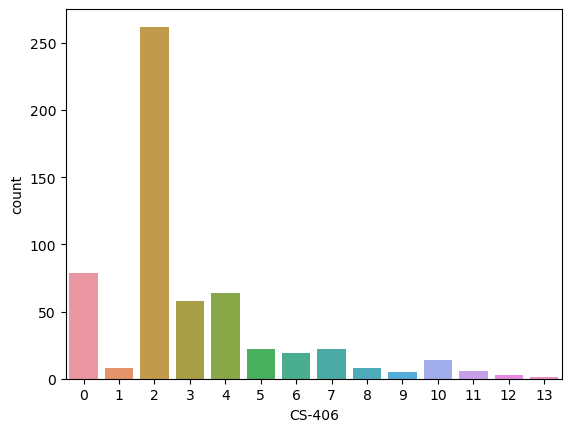

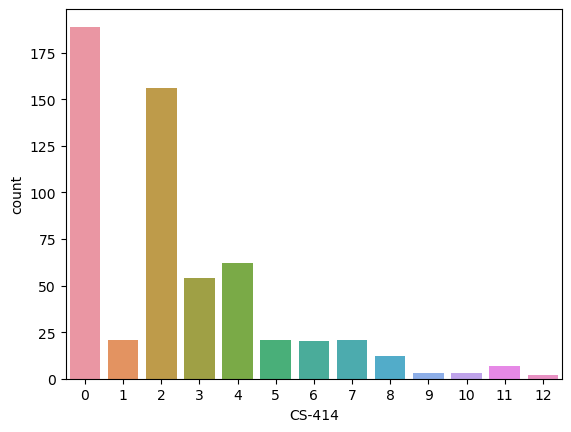

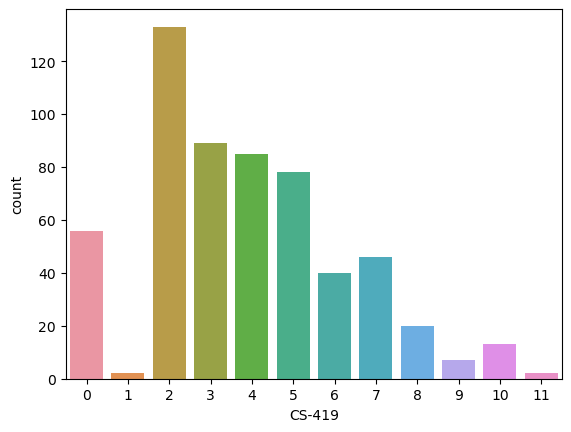

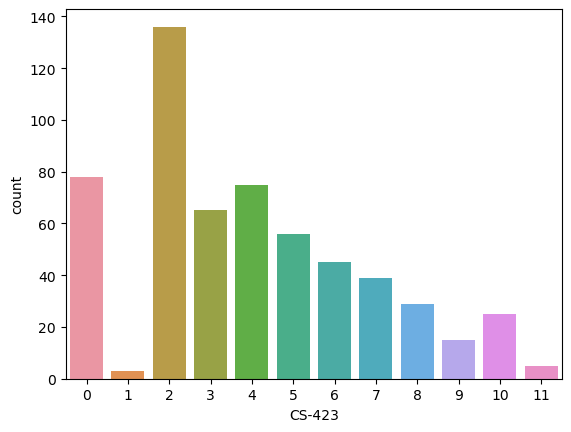

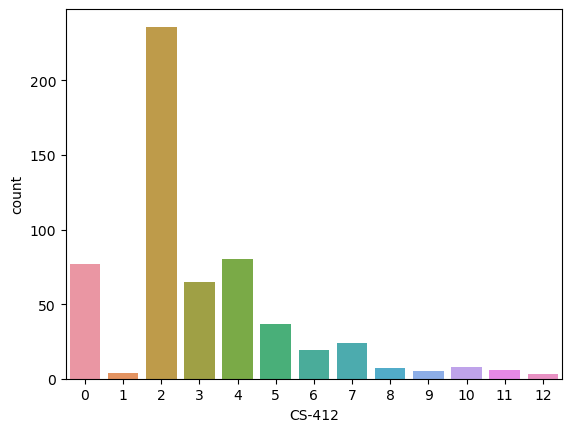

In [166]:
for i in df.columns:
    if df[i].dtypes!='float64':
        sns.countplot(x=i,data=df)
        plt.show()

# Encoding  Using Label Encoder 

In [161]:
lb=LabelEncoder()
for i in df.columns:
    if df[i].dtypes!='float64':
        df[i]=lb.fit_transform(df[i].values.reshape(-1,1))
        
df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
Seat No.,,,,,,,,,,,,,,,,,,,,,
CS-97001,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
CS-97002,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
CS-97003,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
CS-97004,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
CS-97005,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448


here we have converted all the object features into the numerical features 

# Separating the dataset into two part intput features and the target variable('output features')

In [162]:
x=df.drop('CGPA',axis=1)
y=df['CGPA']

In [163]:
x.head(3)

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
Seat No.,,,,,,,,,,,,,,,,,,,,,
CS-97001,5,10,8,6,8,10,9,8,5,8,...,6,8,8,8,8,2,0,8,3,2
CS-97002,0,9,10,9,5,6,9,0,10,9,...,9,10,9,6,9,2,5,6,6,3
CS-97003,0,3,0,5,4,0,5,4,2,2,...,2,3,3,0,6,0,0,0,2,0


In [164]:
y.head(5)

Seat No.
CS-97001    2.205
CS-97002    2.008
CS-97003    3.608
CS-97004    1.906
CS-97005    3.448
Name: CGPA, dtype: float64

# Scaling dataset using (Standard Scaler)

In [165]:
std=StandardScaler()
x=pd.DataFrame(std.fit_transform(x))
x

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.400402,1.770900,1.722261,0.549869,1.374222,2.657832,1.790004,1.333963,0.419492,1.024565,...,0.663660,1.169315,1.155824,1.533685,0.958939,-0.399094,-0.960095,1.740513,-0.346121,-0.450178
1,-1.242052,1.411559,2.397448,1.488043,0.369509,1.173242,1.790004,-1.307365,2.302589,1.342687,...,1.715324,1.764660,1.521056,0.862110,1.325686,-0.399094,1.042149,0.900418,0.727983,-0.021043
2,-1.242052,-0.744483,-0.978490,0.237145,0.034605,-1.053643,0.322008,0.013299,-0.710366,-0.884168,...,-0.738559,-0.319046,-0.670339,-1.152616,0.225444,-1.210063,-0.960095,-1.619869,-0.704156,-1.308446
3,1.714365,0.692879,2.397448,1.488043,1.709126,-0.311348,2.157003,1.333963,1.925970,0.706443,...,1.364769,1.764660,0.425358,2.205260,0.958939,0.817361,0.241251,1.320466,1.086017,1.695494
4,-0.585070,-1.103823,-0.303302,-0.075580,-1.305012,-1.053643,-0.778989,0.013299,-1.463605,-0.884168,...,-0.738559,0.276298,-0.305107,0.190534,-0.141304,-0.399094,-0.960095,-0.779774,-0.704156,-1.308446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.256579,-1.822504,-0.978490,-0.701029,-0.970108,-1.053643,-0.778989,-0.647033,-1.086986,-0.247924,...,-0.037450,-0.616719,-1.035572,-1.152616,-1.975041,-1.210063,0.641700,0.060322,-0.346121,-1.308446
567,-0.913561,-1.822504,-0.978490,-1.326478,-1.305012,-1.053643,-1.512987,-0.647033,-1.463605,-1.520412,...,-0.738559,-0.021374,-0.305107,-1.152616,-1.975041,-0.399094,0.241251,-0.779774,0.727983,-0.450178
568,-0.256579,-1.822504,-0.303302,-0.075580,-1.305012,-1.053643,-1.512987,-1.307365,-1.463605,-0.566046,...,-0.037450,-0.616719,-0.670339,-1.152616,-0.508051,-1.210063,1.442597,0.060322,-0.704156,-0.450178
569,-1.242052,-0.385142,2.059854,-1.326478,1.709126,2.657832,0.322008,1.333963,0.419492,1.024565,...,-0.037450,1.466987,-0.670339,-0.145253,0.958939,2.439300,1.442597,-0.359726,0.369948,1.266360


here we have removed the issue of biasness of our model for increasing the performance of our model

# modeling 


In [173]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rfr=RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred=rfr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is ',maxAccu,'at random_state',maxRS)

Best accuracy is  0.9617098467517732 at random_state 75


# creating train_test_split

In [175]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Linear Rigression

In [177]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
lr_train=lr.predict(x_train)
print('r2_score on training data',r2_score(lr_train,y_train))
print('r2_score ',r2_score(y_test,lr_pred))
print('mean_squared_error',mean_squared_error(y_test,lr_pred))
print('mean_absolute_error',mean_absolute_error(y_test,lr_pred))


r2_score on training data 0.9158645330400483
r2_score  0.9448228470922195
mean_squared_error 0.02094230847102917
mean_absolute_error 0.08807697382974333


# SVR (support vector Regressor)

In [180]:
svr=SVR()
svr.fit(x_train,y_train)
svr_pred=svr.predict(x_test)
svr_train=svr.predict(x_train)
print('r2_score on training data',r2_score(y_train,svr_train))
print('r2 score on testing data',r2_score(y_test,svr_pred))
print('mean_squared_eror',mean_squared_error(y_test,svr_pred))
print('mean_absolute_eror',mean_absolute_error(y_test,svr_pred))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,svr_pred)))

r2_score on training data 0.9632569450249617
r2 score on testing data 0.9466898692991292
mean_squared_eror 0.020233686280161266
mean_absolute_eror 0.08144035824214697
sqrt mean_squared_error 0.14224516258966863


# KNeighbors Regressor

In [181]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
knn_train=knn.predict(x_train)
print('r2_score on training data',r2_score(y_train,knn_train))
print('r2_score on testing data',r2_score(y_test,knn_pred))
print('mean_squared_error',mean_squared_error(y_test,knn_pred))
print('mean_absolute_error',mean_absolute_error(y_test,knn_pred))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,knn_pred)))

r2_score on training data 0.9289455442147805
r2_score on testing data 0.9379066252833834
mean_squared_error 0.023567337906976762
mean_absolute_error 0.09169651162790701
sqrt mean_squared_error 0.15351657209232092


# Decision Tree Regressor

In [182]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred=dtr.predict(x_test)
dtr_train=dtr.predict(x_train)
print('r2_score on training data',r2_score(y_train,dtr_train))
print('r2_score on testing data',r2_score(y_test,dtr_pred))
print('mean_squared_error',mean_squared_error(y_test,dtr_pred))
print('mean_absolute_error',mean_absolute_error(y_test,dtr_pred))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,dtr_pred)))

r2_score on training data 1.0
r2_score on testing data 0.871605879542172
mean_squared_error 0.04873156976744186
mean_absolute_error 0.17486046511627906
sqrt mean_squared_error 0.22075228145467005


# Random Forest Regressor

In [183]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)
rfr_train=rfr.predict(x_train)
print('r2_score on training data',r2_score(y_train,rfr_train))
print('r2_score on testing data',r2_score(y_test,rfr_pred))
print('mean_squared_error',mean_squared_error(y_test,rfr_pred))
print('mean_absolute_error',mean_absolute_error(y_test,rfr_pred))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,rfr_pred)))

r2_score on training data 0.9825142979058565
r2_score on testing data 0.9552907295891641
mean_squared_error 0.016969257801744155
mean_absolute_error 0.0911987790697673
sqrt mean_squared_error 0.13026610380964096


# Extra Trees Regressor

In [184]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr_pred=etr.predict(x_test)
etr_train=etr.predict(x_train)
print('r2_score on training data',r2_score(y_train,etr_train))
print('r2_score on testing data',r2_score(y_test,etr_pred))
print('mean_squared_error',mean_squared_error(y_test,etr_pred))
print('mean_absolute_error',mean_absolute_error(y_test,etr_pred))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,etr_pred)))

r2_score on training data 1.0
r2_score on testing data 0.9678078896944469
mean_squared_error 0.012218410498255785
mean_absolute_error 0.08155854651162771
sqrt mean_squared_error 0.11053691916394172


# Ada Boost Regressor

In [185]:
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
abr_pred=abr.predict(x_test)
abr_train=abr.predict(x_train)
print('r2_score on training data',r2_score(y_train,abr_train))
print('r2_score on testing data',r2_score(y_test,abr_pred))
print('mean_squared_error',mean_squared_error(y_test,abr_pred))
print('mean_absolute_error',mean_absolute_error(y_test,abr_pred))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,abr_pred)))

r2_score on training data 0.9327050412179774
r2_score on testing data 0.9101823475094787
mean_squared_error 0.034089997136024064
mean_absolute_error 0.15946348367882973
sqrt mean_squared_error 0.18463476686698002


# Gradient Boosting Regressor

In [186]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr_pred=gbr.predict(x_test)
gbr_train=gbr.predict(x_train)
print('r2_score on training data',r2_score(y_train,gbr_train))
print('r2_score on testing data',r2_score(y_test,gbr_pred))
print('mean_squared_error',mean_squared_error(y_test,gbr_pred))
print('mean_absolute_error',mean_absolute_error(y_test,gbr_pred))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,gbr_pred)))

r2_score on training data 0.9958820122533774
r2_score on testing data 0.9709159312135685
mean_squared_error 0.01103876347400655
mean_absolute_error 0.07709325602044893
sqrt mean_squared_error 0.10506551991022815


# cross validation

In [189]:
score1=cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('the difference between the r2_score and the cross validation score',(r2_score(y_test,lr_pred)-score1.mean())*100)

[0.8927601  0.93427094 0.90082619 0.94061762 0.84878197]
0.9034513625626615
the difference between the mean squared error and the cross validation score 4.137148452955808


In [191]:
score2=cross_val_score(svr,x,y,cv=5)
print(score2)
print(score2.mean())
print('the difference between the r2_score and the cross validation score',(r2_score(y_test,svr_pred)-score2.mean())*100)

[0.89656309 0.92627299 0.90977131 0.9411797  0.85204761]
0.9051669400105776
the difference between the r2_score and the cross validation score 4.152292928855161


In [192]:
score3=cross_val_score(knn,x,y,cv=5)
print(score3)
print(score3.mean())
print('difference between the r2_score and cross validation score',(r2_score(y_test,knn_pred)-score3.mean())*100)

[0.88957963 0.9359176  0.8654431  0.96068931 0.80762497]
0.891850920275352
difference between the r2_score and cross validation score 4.605570500803147


In [193]:
score4=cross_val_score(dtr,x,y,cv=5)
print(score4)
print(score4.mean())
print('difference between the r2_score and the cross validation score',(r2_score(y_test,dtr_pred)-score4.mean())*100)

[0.8210881  0.75312655 0.84768491 0.77664622 0.73885528]
0.7874802106186618
difference between the r2_score and the cross validation score 8.412566892351014


In [194]:
score5=cross_val_score(abr,x,y,cv=5)
print(score5)
print(score5.mean())
print('difference between the r2_score and cross validation score',(r2_score(y_test,abr_pred)-score5.mean())*100)

[0.86864964 0.90614724 0.88410203 0.89518215 0.81482606]
0.8737814231449686
difference between the r2_score and cross validation score 3.6400924364510034


In [195]:
score6=cross_val_score(rfr,x,y,cv=5)
print(score6)
print(score6.mean())
print('difference between the r2_score and cross validation score',(r2_score(y_test,rfr_pred)-score6.mean())*100)

[0.89754697 0.91799968 0.94323255 0.92111831 0.86330456]
0.9086404117235067
difference between the r2_score and cross validation score 4.6650317865657325


In [196]:
score7=cross_val_score(etr,x,y,cv=5)
print(score7)
print(score7.mean())
print('difference between the r2_score and the',(r2_score(y_test,etr_pred)-score7.mean())*100)

[0.91748662 0.95230745 0.95159162 0.94998291 0.86796157]
0.9278660321587612
difference between the r2_score and the 3.9941857535685688


In [197]:
score8=cross_val_score(gbr,x,y,cv=5)
print(score8)
print(score8.mean())
print('difference between r2_score and the cross validation is',(r2_score(y_test,gbr_pred)-score8.mean())*100)

[0.91975629 0.96060544 0.96114835 0.94798109 0.87423135]
0.9327445025378523
difference between r2_score and the cross validation is 3.81714286757161


as we can see gbr('Gradient Boosting Regressor') model is giving high performance so that,s why  it is our best fit model

# Hyper Parameter Tunning

In [201]:
param={'learning_rate':[0.1,0.2,0.4,1],
      'n_estimators':[50,100,150,200],
      'max_depth':[1,2,3,4,5,]}
gbr=GradientBoostingRegressor()

In [203]:
grid=GridSearchCV(gbr,param)

In [205]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.2, 0.4, 1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 100, 150, 200]})

In [206]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}

In [216]:
final_model=GradientBoostingRegressor(learning_rate=0.6,max_depth=6,n_estimators=100)
final_model.fit(x_train,y_train)
final_pred=final_model.predict(x_test)
print('r2_score',r2_score(y_test,final_pred))
print('mean_squared_error',mean_squared_error(y_test,final_pred))
print('mean_absolute_error',mean_absolute_error(y_test,final_pred))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,final_pred)))

r2_score 0.9134503956436661
mean_squared_error 0.03284962012275712
mean_absolute_error 0.13990476717438566
sqrt mean_squared_error 0.18124464163874507


In [217]:
Final_model1=GradientBoostingRegressor(learning_rate=0.1,max_depth=4,n_estimators=150)
Final_model1.fit(x_train,y_train)
Final_pred1=Final_model1.predict(x_test)
print('r2_score',r2_score(y_test,Final_pred1))
print('mean_squared_error',mean_squared_error(y_test,Final_pred1))
print('mean_absolute_error',mean_absolute_error(y_test,Final_pred1))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,Final_pred1)))
      

r2_score 0.9641242911752015
mean_squared_error 0.013616508305194014
mean_absolute_error 0.08595122300168467
sqrt mean_squared_error 0.11668979520589627


In [218]:
import joblib
joblib.dump(Final_model1,'student grade CGPA.pkl')

['student grade CGPA.pkl']

In [221]:
result=joblib.load('student grade CGPA.pkl')

In [222]:
output=result.predict(x_test)
output

array([3.53872021, 2.58637344, 2.11149446, 3.31008717, 3.2150259 ,
       2.78656951, 2.60802137, 1.97626278, 2.56925401, 3.9264478 ,
       2.2533715 , 2.46998284, 2.43913289, 2.77652593, 2.99178954,
       2.7631123 , 3.01666665, 3.32588754, 2.96514396, 3.56658867,
       2.99198991, 3.64718996, 3.24842353, 2.83138757, 2.71005517,
       3.34714693, 2.8316114 , 3.74611921, 2.50326012, 2.08721316,
       1.92412762, 3.56685401, 3.23426029, 2.39938643, 2.55724024,
       1.90927797, 2.56736193, 2.18010606, 2.9363928 , 3.00806293,
       2.00735242, 3.20607019, 2.71914196, 1.95790554, 2.90939538,
       2.61009207, 3.0188844 , 3.8238977 , 3.61632309, 3.39571431,
       3.44449643, 2.22113437, 3.04303685, 3.13219082, 2.71502713,
       3.74284904, 2.71948569, 2.8408644 , 3.2690093 , 2.05726233,
       3.71605422, 2.91247606, 3.89312824, 3.04490072, 3.62212535,
       3.22698516, 2.98227478, 2.60347091, 3.4116673 , 2.70528388,
       3.51490017, 2.34791449, 3.28529355, 3.70451531, 3.56420

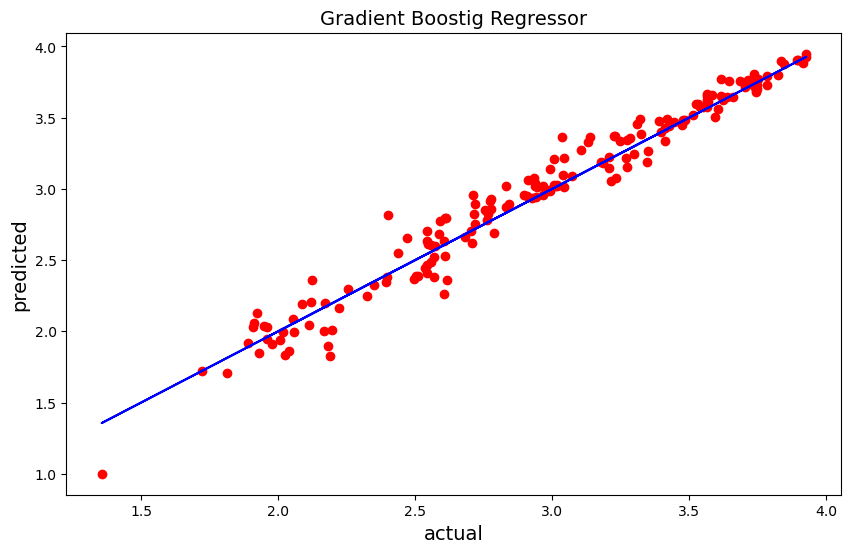

In [223]:
plt.figure(figsize=(10,6))
plt.scatter(x=Final_pred1,y=y_test,color='r')
plt.plot(Final_pred1,Final_pred1,color='b')
plt.xlabel('actual',fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.title('Gradient Boostig Regressor',fontsize=14)
plt.show()
